<a href="https://colab.research.google.com/github/sazio/Transients/blob/master/Python/Winner_Takes_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import warnings
warnings.filterwarnings('ignore')

In [2]:
def nakaRushton(x, M = 100, sigma = 120):
  if x >= 0:
    return (M*x*x)/(sigma*sigma + x*x)
  else:
    return 0 

In [3]:
# Defining WTA 2 neurons ODE system 
def f(Y, t, tau = 1, k_1 = 120 , k_2 = 120, alpha = 3):
    I_1, I_2 = Y
    return [(1/tau)*(-I_1 + nakaRushton(k_1 - alpha*I_2)), (1/tau)*(-I_2 + nakaRushton(k_2 - alpha*I_1))]

In [20]:
I_1 = np.linspace(0., 60, 20)
I_2 = np.linspace(0., 60, 20)

In [21]:
Y1, Y2 = np.meshgrid(I_1, I_2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

for i in tqdm(range(NI)):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

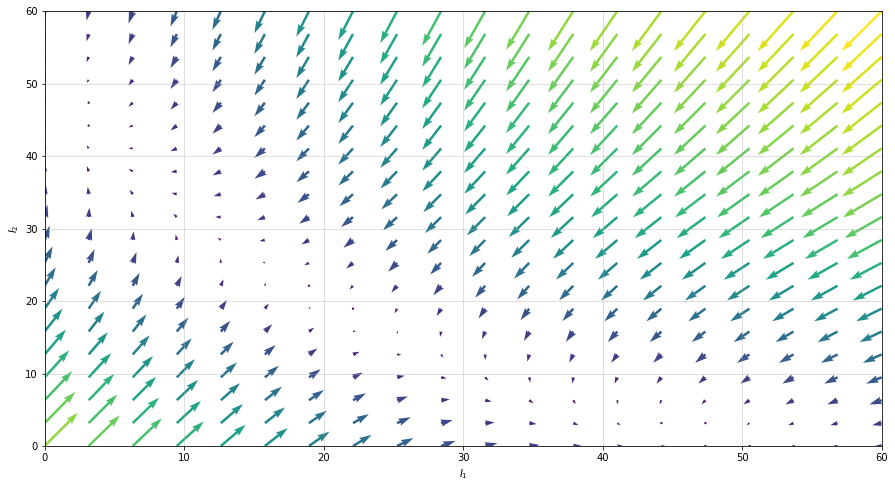

In [23]:
plt.figure(figsize = (15,8))
m= np.hypot(u, v)
Q = plt.quiver(Y1, Y2, u, v,m)


plt.xlabel('$I_1$')
plt.ylabel('$I_2$')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid(alpha = 0.5)
plt.savefig('WTA_phase_portrait_arrows.png')

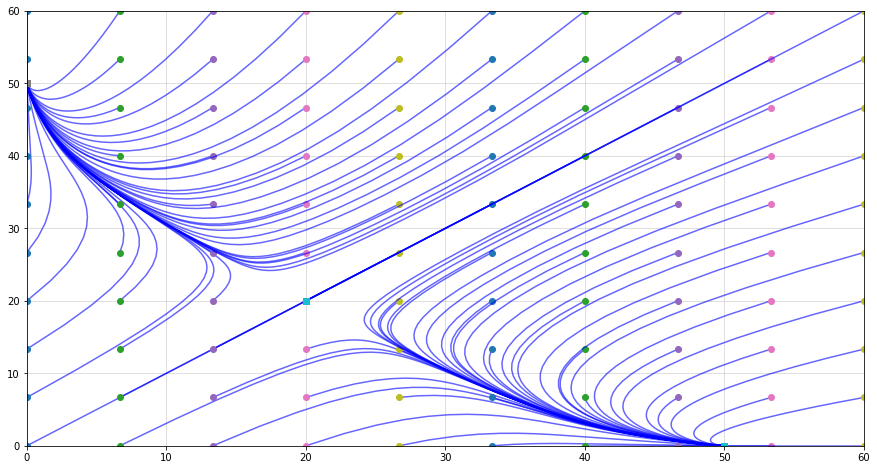

In [19]:
plt.figure(figsize = (15,8))
for y20 in np.linspace(0,60,10):
  for y10 in np.linspace(0,60,10):
    tspan = np.linspace(0, 50, 500)
    y0 = [y10, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-', alpha = 0.6) # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([0, 60])
plt.ylim([0,60])
plt.grid(alpha = 0.5)
plt.savefig("WTA_phase_100_IC.pdf")
plt.show()